# Week 4 Individual Coding Assignment

For this week's individual assignment, I'm hoping to upload a dataset that my group hasn't explored yet for our ADU research proposal. Last week, we were asked to look at two forms of census data. We explored household median income and percentage using transportation for work commutes at the block group level. 

Since we started this project, I've been eager to take a closer look at one of our data sources that isn't census-based, the permit data from the LA Department of Building and Safety (LADBS). I'll attempt to explore that data now. My hope is to plot the ADU permits filed from 2014 to 2020 onto a context map of the city of LA. If I'm able to, I'd also like to experiment with how this information is conveyed visually (dot size / color for each permit), as well as see if I can create filters so that only certain permit info displays for a specific year. 

I'll mostly be using Week 3's lab/assignment as a rough guide for how to do this. I will also be referring to my notes from attending office hours with Yoh to discuss an approach for this assignment. I'll start by importing the relevant libraries.

## Loading Libraries

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

## Importing Data

I have retrieved a dataset from LADBS that provides information about the permits issued for the construction, remodeling, and repair of buildings in the city of LA from 2014 - 2020. I accessed this information using the following link: https://data.lacity.org/City-Infrastructure-Service-Requests/Building-and-Safety-Permit-Information-Old/yv23-pmwf/data. The website is pretty helpful in that it has a feature built in that allows me to filter the information in the dataset. 

When I scroll through the cells on the website, I see that I can find more detail about each permit in the "Work Description" column. This is where I start to see the words "Accessory Dwelling Unit" and "ADU." I use the following filters so that only ADU permits with latitude/longitude information show up in the dataset:

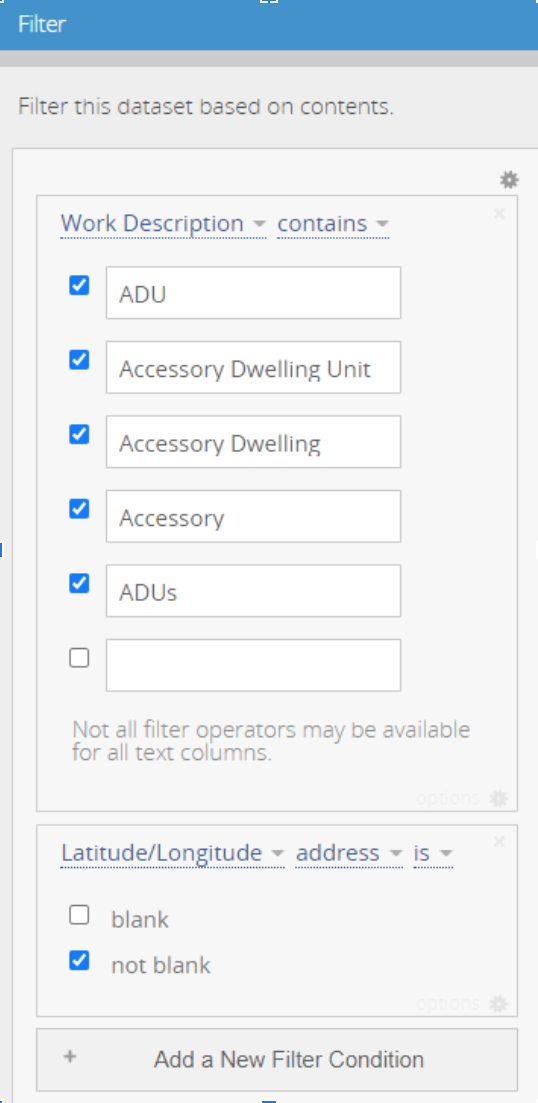

With this filter, the number of permits in my dataset decreases from 1,244,137 to 9,095. This number seems a little low to me, based on past reports I've read about ADU development in the LA region. I suspect that we may need to filter the dataset a different way the next time we do this.. I'm also a bit worried that some permits were filed without the "Work Description" portion filled.. it's unclear at this moment. For the sake of time, I'm just going to proceed with what I have and see what happens. I'm more interested with using this assignment as a way to develop a process to upload and plot permit data. I can always change the dataset I use later.

I'll load the dataset below.

In [2]:
df = gpd.read_file('data_NK/Building_and_Safety_Permit_Information_Old.xlsx - Building_and_Safety_Permit_Info.csv')

## Inspecting Data

Now I just want to do a couple quick data checks to see what my dataframe looks like.

In [3]:
df.shape

(9095, 60)

Output: Using the .shape command, I can see that this dataset has 9,095 rows and 60 columns.

In [4]:
df.head()

,Assessor Book,Assessor Page,Assessor Parcel,Tract,Block,Lot,Reference # (Old Permit #),PCIS Permit #,Status,Status Date,...,Zone,Occupancy,Floor Area-L.A. Building Code Definition,Census Tract,Council District,Latitude,Longitude,Existing Code,Proposed Code,geometry
0,5069,2,15,TR 4713,,43,20WL05816,19014-10000-05185,Issued,3/10/2020,...,R1R3-RG-O,,115,2169,10,34.04739,-118.36467,7,1,None
1,2226,14,6,TR 20444,,6,20ON 1930,20016-10000-19416,Issued,10/27/2020,...,R1-1,,0,1321.02,6,34.20732,-118.49688,1,1,None
2,2637,1,20,TR 14616,,87,19VN92737,19016-20000-10523,CofO Issued,10/31/2020,...,R1-1,,0,1199,6,34.2294,-118.43923,1,1,None
3,5053,24,32,CHA'S VICTOR HALL TRACT,26,21,20ON 1938,20010-10000-02259,Issued,10/27/2020,...,R1R3-O-CPIO,,438,2221,8,34.02655,-118.30291,,1,None
4,6051,20,2,TR 6478,15,2,19LA32955,18014-70000-05489,Issued,9/12/2019,...,R1-1,,681,2408,8,33.94022,-118.25885,7,1,None


Output: Looks pretty good. The dataset appears to match the .csv file I viewed in Excel before starting this notebook. 

One thing to note - I did have to edit the .csv file in Excel before uploading. The Latitude/Longitude information was initially provided in one column and each cell read something like "(34.04739, -118.36467)." I separated the latitude and longitude out and deleted the parantheses using the "split text to columns" and "find and replace" tools in Excel. Thank you for the guidance on that, Yoh!

I'd like to see all the columns, though. I'll try that now. 

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Assessor Book,Assessor Page,Assessor Parcel,Tract,Block,Lot,Reference # (Old Permit #),PCIS Permit #,Status,Status Date,Permit Type,Permit Sub-Type,Permit Category,Project Number,Event Code,Initiating Office,Issue Date,Address Start,Address Fraction Start,Address End,Address Fraction End,Street Direction,Street Name,Street Suffix,Suffix Direction,Unit Range Start,Unit Range End,Zip Code,Work Description,Valuation,Floor Area-L.A. Zoning Code Definition,# of Residential Dwelling Units,# of Accessory Dwelling Units,# of Stories,Contractor's Business Name,Contractor Address,Contractor City,Contractor State,License Type,License #,Principal First Name,Principal Middle Name,Principal Last Name,License Expiration Date,Applicant First Name,Applicant Last Name,Applicant Business Name,Applicant Address 1,Applicant Address 2,Applicant Address 3,Zone,Occupancy,Floor Area-L.A. Building Code Definition,Census Tract,Council District,Latitude,Longitude,Existing Code,Proposed Code,geometry
0,5069,2,15,TR 4713,,43,20WL05816,19014-10000-05185,Issued,3/10/2020,Bldg-Addition,1 or 2 Family Dwelling,Plan Check,,,METRO,3/10/2020,1563,,1563,,S,GENESEE,AVE,,,,90019,CONVERTING OF (E) GARAGE INTO ACCESSORY DWELLI...,"50,000.00",386,0,1,1,FURER CONSTRUCTION INC,3133 ROBERTS AVE,CULVER CITY,CA,B,988604,HANSPETER,,FURER,11/30/2021,MARC,RAZO,,,,,R1R3-RG-O,,115,2169,10,34.04739,-118.36467,7,1,None
1,2226,14,6,TR 20444,,6,20ON 1930,20016-10000-19416,Issued,10/27/2020,Bldg-Alter/Repair,1 or 2 Family Dwelling,Plan Check,,,METRO,10/27/2020,7527,,7529,,N,RUFFNER,AVE,,,,91406,CONVERSION OF (E) ATTACHED GARAGE TO ACCESSORY...,"50,000.00",360,0,1,1,OWNER-BUILDER,,,,NA,0,,,,1/1/2022,JAVIER,VASQUES,,,,,R1-1,,0,1321.02,6,34.20732,-118.49688,1,1,None
2,2637,1,20,TR 14616,,87,19VN92737,19016-20000-10523,CofO Issued,10/31/2020,Bldg-Alter/Repair,1 or 2 Family Dwelling,Plan Check,,,VAN NUYS,4/29/2019,8764,,8766,,N,RANCHITO,AVE,,,,91402,CONVERT THE (E) ATTACHED GARAGE INTO A (N) ADU...,"20,000.00",388.5,,1,,OWNER-BUILDER,,,,NA,0,,,,,NOEMI,ESPINO,,,,,R1-1,,0,1199,6,34.2294,-118.43923,1,1,None
3,5053,24,32,CHA'S VICTOR HALL TRACT,26,21,20ON 1938,20010-10000-02259,Issued,10/27/2020,Bldg-New,1 or 2 Family Dwelling,Plan Check,,,METRO,10/27/2020,3023,,3023,,S,HALLDALE,AVE,,,,90018,NEW DETACHED ACCESSORY DWELLING UNIT PER STATE...,"44,238.00",438,,1,1,SO CAL CONSTRUCTION ENTERPRISES INC,P O BOX 96,SAN GABRIEL,CA,B,832488,GARY,JUAN,URBINA,3/31/2022,RODNEY,REDONDO,,.,.,.,R1R3-O-CPIO,,438,2221,8,34.02655,-118.30291,,1,None
4,6051,20,2,TR 6478,15,2,19LA32955,18014-70000-05489,Issued,9/12/2019,Bldg-Addition,1 or 2 Family Dwelling,Plan Check,,,SOUTH LA,9/12/2019,857,,857,,E,106TH,ST,,,,90002,NEW 1 STORY ACCESSORY DWELLING UNIT PER AB 49...,"103,000.00",961,,1,1,OWNER-BUILDER,,,,NA,0,,,,1/1/2000,WILLIAM,FLORES,,2513 1/2 CALIFORNIA ST,,"HUNTINGTON PARK, CA",R1-1,,681,2408,8,33.94022,-118.25885,7,1,None


Output: Now that I'm scrolling through all the columns, I do notice that there is one that is titled, "# of Accessory Dwelling Units." Interesting... didn't notice this before when I viewed this on LADBS's website. I wonder if this is how I should be filtering the data instead. Something I'll think more on for next time.

I'm also noticing that no "geometry" is provided, unlike previous datasets I've worked with (block groups). I'd guess this dataset is just providing "points" for each permit filed.

## Converting dataframe to geodataframe

Now I'll attempt to convert the dataframe to a *geo*dataframe. I was initially confused about how to do this with this specific dataset. I fell into quite the rabbit hole on google / stackoverflow searching for "how to convert csv to geojson." My hope was to convert the file to a geojson and then do the same process that I did with last week's assignment. 

However, after meeting with Yoh in office hours, he directed me to the following source (https://geopandas.org/gallery/create_geopandas_from_pandas.html), which suggests that I use the following code: 

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
    
I'll try that now.

In [7]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

NameError: name 'geopandas' is not defined

Output: This did not work for me. I think I need to replace "geopandas" with "gpd." I'll tweak the code to say the following: 

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [9]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

Output: Okay, that seems to have worked...

## Plotting data

Now that I've converted the dataframe to a geodataframe, I want to try plotting it! I'll do that below. 

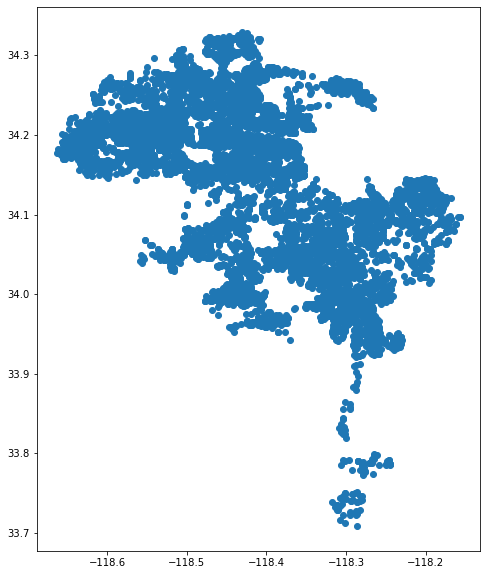

In [10]:
gdf.plot(figsize=(10,10))

Output: Yayy it worked! The shape created by the dots matches the boundaries of the city of LA.

## Defining geodataframe as CRS

Thanks to Yoh, I know that I now need to define the geodataframe as a coordinate reference system (CRS). My understanding is that even though the dataset provides latitudal and longitudinal information, Python is not aware that this is spatial and I have to define what coordinate system it's in. I'll run the code Yoh suggested now.

In [11]:
gdf.set_crs(epsg=4326, inplace=True)

,Assessor Book,Assessor Page,Assessor Parcel,Tract,Block,Lot,Reference # (Old Permit #),PCIS Permit #,Status,Status Date,Permit Type,Permit Sub-Type,Permit Category,Project Number,Event Code,Initiating Office,Issue Date,Address Start,Address Fraction Start,Address End,Address Fraction End,Street Direction,Street Name,Street Suffix,Suffix Direction,Unit Range Start,Unit Range End,Zip Code,Work Description,Valuation,Floor Area-L.A. Zoning Code Definition,# of Residential Dwelling Units,# of Accessory Dwelling Units,# of Stories,Contractor's Business Name,Contractor Address,Contractor City,Contractor State,License Type,License #,Principal First Name,Principal Middle Name,Principal Last Name,License Expiration Date,Applicant First Name,Applicant Last Name,Applicant Business Name,Applicant Address 1,Applicant Address 2,Applicant Address 3,Zone,Occupancy,Floor Area-L.A. Building Code Definition,Census Tract,Council District,Latitude,Longitude,Existing Code,Proposed Code,geometry
0,5069,2,15,TR 4713,,43,20WL05816,19014-10000-05185,Issued,3/10/2020,Bldg-Addition,1 or 2 Family Dwelling,Plan Check,,,METRO,3/10/2020,1563,,1563,,S,GENESEE,AVE,,,,90019,CONVERTING OF (E) GARAGE INTO ACCESSORY DWELLI...,"50,000.00",386,0,1,1,FURER CONSTRUCTION INC,3133 ROBERTS AVE,CULVER CITY,CA,B,988604,HANSPETER,,FURER,11/30/2021,MARC,RAZO,,,,,R1R3-RG-O,,115,2169,10,34.04739,-118.36467,7,1,POINT (-118.36467 34.04739)
1,2226,14,6,TR 20444,,6,20ON 1930,20016-10000-19416,Issued,10/27/2020,Bldg-Alter/Repair,1 or 2 Family Dwelling,Plan Check,,,METRO,10/27/2020,7527,,7529,,N,RUFFNER,AVE,,,,91406,CONVERSION OF (E) ATTACHED GARAGE TO ACCESSORY...,"50,000.00",360,0,1,1,OWNER-BUILDER,,,,NA,0,,,,1/1/2022,JAVIER,VASQUES,,,,,R1-1,,0,1321.02,6,34.20732,-118.49688,1,1,POINT (-118.49688 34.20732)
2,2637,1,20,TR 14616,,87,19VN92737,19016-20000-10523,CofO Issued,10/31/2020,Bldg-Alter/Repair,1 or 2 Family Dwelling,Plan Check,,,VAN NUYS,4/29/2019,8764,,8766,,N,RANCHITO,AVE,,,,91402,CONVERT THE (E) ATTACHED GARAGE INTO A (N) ADU...,"20,000.00",388.5,,1,,OWNER-BUILDER,,,,NA,0,,,,,NOEMI,ESPINO,,,,,R1-1,,0,1199,6,34.2294,-118.43923,1,1,POINT (-118.43923 34.22940)
3,5053,24,32,CHA'S VICTOR HALL TRACT,26,21,20ON 1938,20010-10000-02259,Issued,10/27/2020,Bldg-New,1 or 2 Family Dwelling,Plan Check,,,METRO,10/27/2020,3023,,3023,,S,HALLDALE,AVE,,,,90018,NEW DETACHED ACCESSORY DWELLING UNIT PER STATE...,"44,238.00",438,,1,1,SO CAL CONSTRUCTION ENTERPRISES INC,P O BOX 96,SAN GABRIEL,CA,B,832488,GARY,JUAN,URBINA,3/31/2022,RODNEY,REDONDO,,.,.,.,R1R3-O-CPIO,,438,2221,8,34.02655,-118.30291,,1,POINT (-118.30291 34.02655)
4,6051,20,2,TR 6478,15,2,19LA32955,18014-70000-05489,Issued,9/12/2019,Bldg-Addition,1 or 2 Family Dwelling,Plan Check,,,SOUTH LA,9/12/2019,857,,857,,E,106TH,ST,,,,90002,NEW 1 STORY ACCESSORY DWELLING UNIT PER AB 49...,"103,000.00",961,,1,1,OWNER-BUILDER,,,,NA,0,,,,1/1/2000,WILLIAM,FLORES,,2513 1/2 CALIFORNIA ST,,"HUNTINGTON PARK, CA",R1-1,,681,2408,8,33.94022,-118.25885,7,1,POINT (-118.25885 33.94022)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090,2631,13,44,TR 7045,,110,18VN82561,18014-20000-06647,CofO Issued,8/19/2020,Bldg-Addition,1 or 2 Family Dwelling,Plan Check,,,VAN NUYS,12/4/2018,11785,,11785,,W,NEENACH,ST,,,,91352,"CONVERT GARAGE AND ADD 26'-9"" X 25'-10"" TO CRE...","93,000.00","1,200",,1,1,OWNER-BUILDER,,,,NA,0,,,,,JOSE,,,6179 VAN NUYS BL.,,VAN NUYS CA,R1-1-CUGU,,690,1212.22,6,34.23033,-118.38998,7,1,POINT (-118.38998 34.23033)
9091,2224,34,79,P M 1577,,B,21ON 2698,20014-30000-00770,Issued,1/20/2021,Bldg-Addition,Commercial,Plan Check,,,WEST LA,1/20/2021,15719,,15719,,W,VANOWEN,ST,,,,91406,2-STORY ADDITION AND CHANGE OF USE OF EXISTING...,"600,000.00","4,390",,,2,VISIONARY CONSTRUCTION MANAGEMENT PARTNERSHIP CO,221 E 12TH ST UNIT 304,LOS ANGELES,CA,B,1039679,SHAHIK,SE

Output: Okay that seems to have worked...

## Converting geodataframe to Web Mercator

As I mentioned at the beginning of this notebook, I am interested in plotting this information on a context map. In order to do so, I will have to convert CRS to Web Mercator in order for contextily to place the data properly. I'll do that now and then attempt to plot the information onto a base map.

In [12]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

## Plotting geodataframe on a basemap

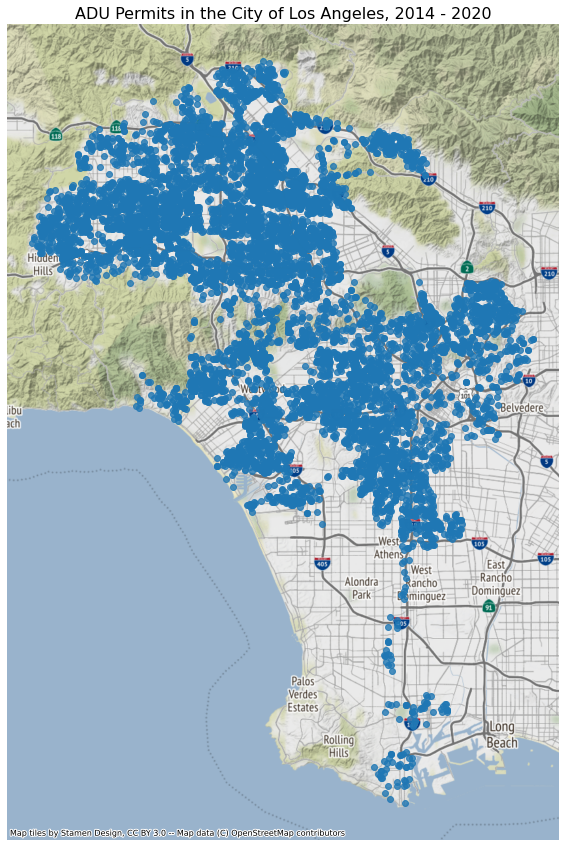

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator.plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('ADU Permits in the City of Los Angeles, 2014 - 2020',fontsize=16)

ctx.add_basemap(ax)

Output: Wonderful! I want to tweak the visual displays a bit to make the circles smaller and assign each year a different color. I'll attempt that now. 

AttributeError: 'PathCollection' object has no property 'size'

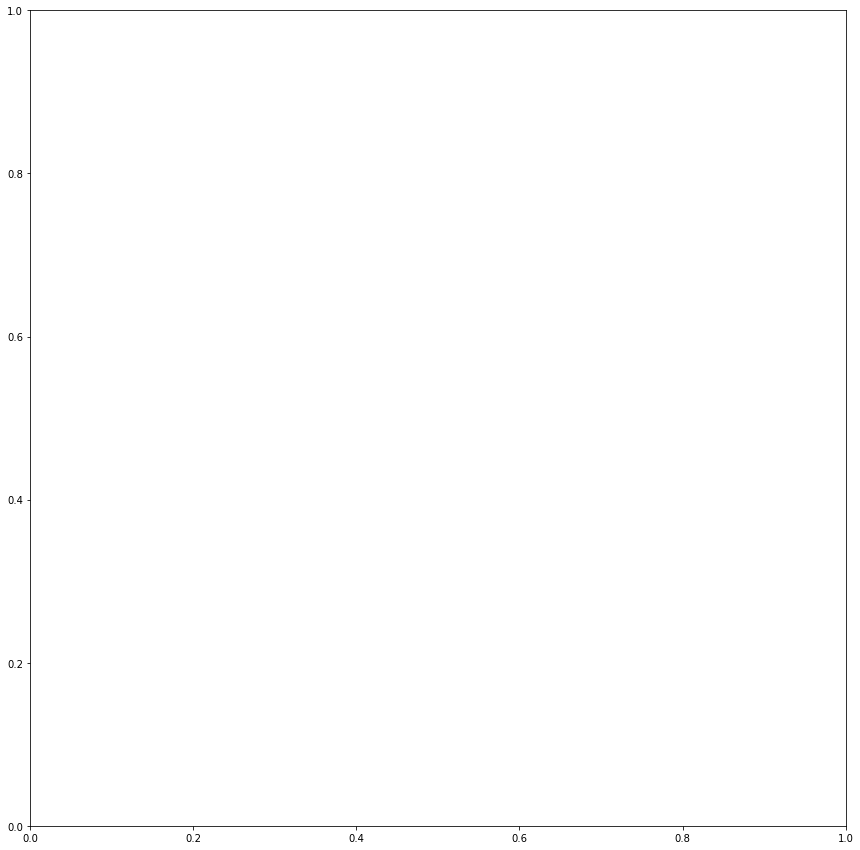

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator.plot(ax=ax, alpha=0.8, size=10)

ax.axis('off')

ax.set_title('ADU Permits in the City of Los Angeles, 2014 - 2020',fontsize=16)

ctx.add_basemap(ax)

I wrote "size=10" after alpha guessing that it would cause issues, but hoping for the all the information above to show up. What I'm really looking for are the options I can play with in my plot. Scrolling through the list, I see "markersize." This seems promising. I'll try "markersize=10" instead and see what happens.

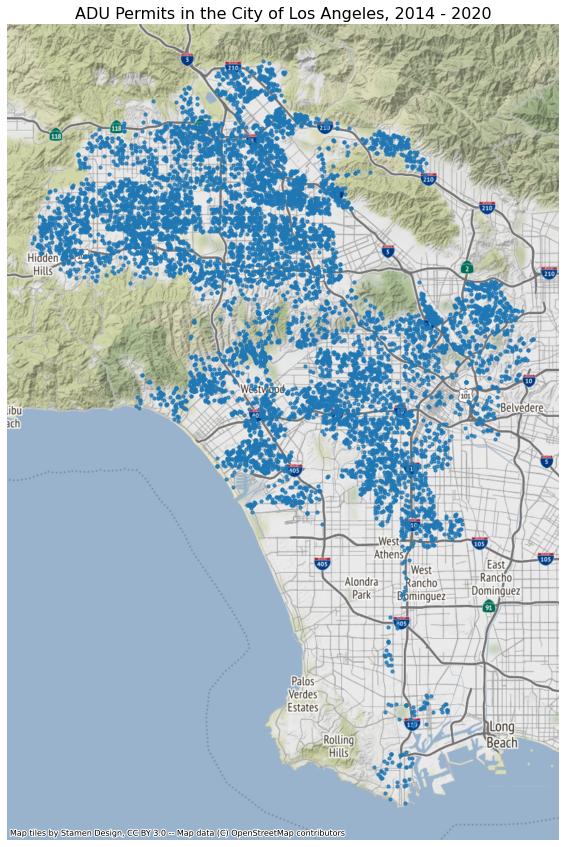

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator.plot(ax=ax, alpha=0.8, markersize=10)

ax.axis('off')

ax.set_title('ADU Permits in the City of Los Angeles, 2014 - 2020',fontsize=16)

ctx.add_basemap(ax)

Output: Yes! Feeling good. Now I'll play with some other options and see what happens.

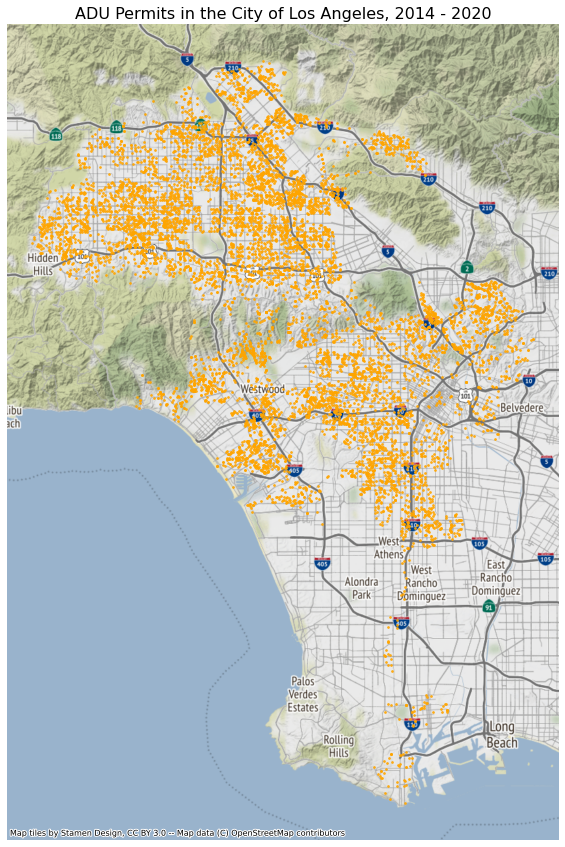

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator.plot(ax=ax, alpha=0.8, markersize=3, color='orange')

ax.axis('off')

ax.set_title('ADU Permits in the City of Los Angeles, 2014 - 2020',fontsize=16)

ctx.add_basemap(ax)

TypeError: '>' not supported between instances of 'str' and 'float'

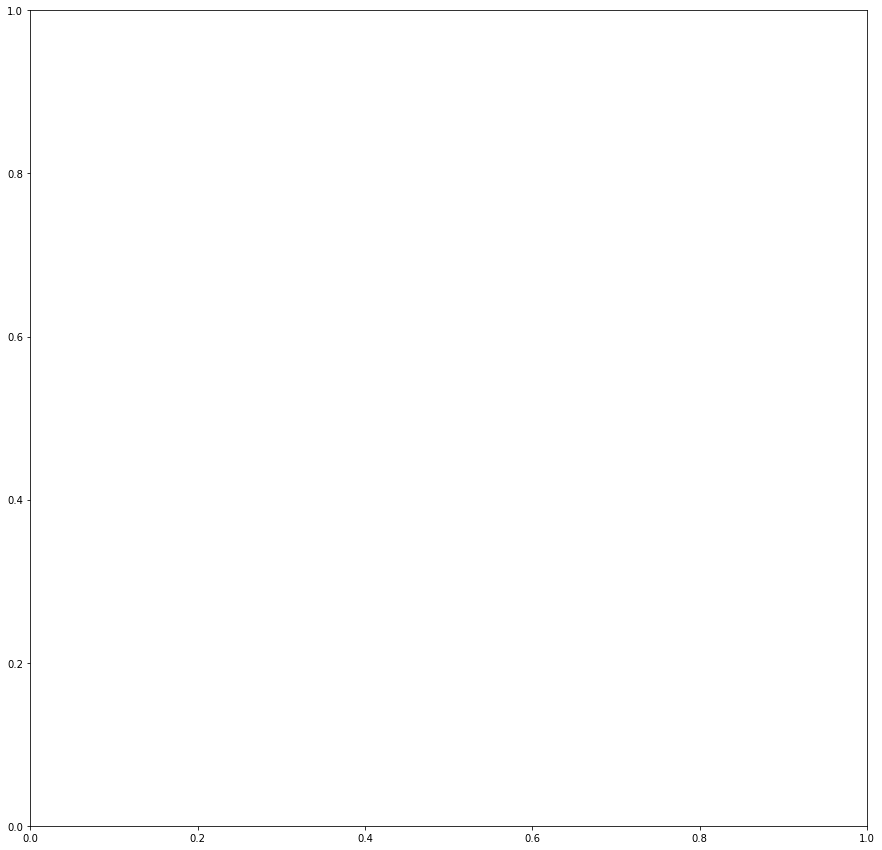

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator.plot[gdf_web_mercator['Issue Date'] > 12/31/2019](ax=ax, alpha=0.8, markersize=10)

ax.axis('off')

ax.set_title('ADU Permits in the City of Los Angeles, 2014 - 2020',fontsize=16)

ctx.add_basemap(ax)

Output: Hmm a bit confused... "'>' not supported between instances of 'str' and 'float'" - so does that mean I need to convert the title of the column "Issue Date" from a string to a float? I'm trying to plot the permits that were filed *after* 1/1/2020. Not sure if I'm approaching this the right way.. I'm also worried that it's interpreting the dates in the "Issue Date" column as a division calculation because of the "/" and then converting that to a decimal (which would then read as a float). Hmm... When I do this again, I think I'll need to edit the .csv file to separate the year from the month/date and create a new "Issue Year" column in order to avoid this mess. 

I'm pretty excited to overlay the Median Household Income census dataset that I explored in Week 3's assignment and see if there are any patterns arising between household income and ADU development. 

Lastly, I have the urge to zoom into and pan around the map I created (similar to how you can view the data in this study: https://storymaps.arcgis.com/stories/400d7b75f18747c4ae1ad22d662781a3). I'm hoping that the final product Bryan and I come up with will allow us to do something like that.